In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#bring in the six packs
df = pd.read_json('BAGJOURNEY_RAWDATA_1573221664276')
df.head(5)

ahlreferencenumber bageventloadlocation passengerinboundseatnumber  \
0                                                                      
1                                                                      
2                                                                      
3                                                                      
4                                                                      

  originalbagtag bageventtrackinglocation bageventsentlocation  \
0                                                                
1                                                                
2                                                                
3                                                                
4                                                                

  handlingstation originstation outboundflightorigin unknown  ...  \
0             GRU           NAT                  GRU      No  ...   
1             JFK           JFK                  JFK      No  ...   
2             JFK           JFK                  JFK      No  ...   
3             GRU           GRU                  GRU      No  ...   
4             GRU           GRU                  GRU      No  ...   

   passengerinboundpnr outboundflightdestination  \
0                                            IGU   
1                                            MXP   
2                                            MXP   
3                                            JPA   
4                                            JPA   

  passengerinboundcheckinsequence  inboundflightdate passengerlastname  \
0                                      1573084800000         OLIVEIRAS   
1                                                  0         SPINOGLIO   
2                                                  0            GIORGI   
3                                                  0            FARIAS   
4                                                  0            FARIAS   

  ohdreferencenumber passengeroutboundcheckinsequence grossweight  \
0                                                 087           1   
1                                                 149          23   
2                                                 157               
3                                                 073         138   
4                                                 073         138   

  passengeroutboundseatnumber inboundflightorigin  
0                         16A                 NAT  
1                         10G                      
2                                                  
3                          2E                      
4                          2E                      

[5 rows x 34 columns]

In [3]:
#check the decoration
# print(df.shape)
# print (df.columns)
df.columns

Index(['ahlreferencenumber', 'bageventloadlocation',
       'passengerinboundseatnumber', 'originalbagtag',
       'bageventtrackinglocation', 'bageventsentlocation', 'handlingstation',
       'originstation', 'outboundflightorigin', 'unknown', 'bagtag',
       'bagtagtype', 'passengeroutboundpnr', 'outboundflightdate',
       'outboundflightairline', 'rushtagindicator', 'inboundflightairline',
       'inboundflightdestination', 'outboundflightnumber',
       'passengerfirstname', 'inboundflightnumber', 'bageventtrackingpointid',
       'bageventtimestamp', 'bageventcode', 'passengerinboundpnr',
       'outboundflightdestination', 'passengerinboundcheckinsequence',
       'inboundflightdate', 'passengerlastname', 'ohdreferencenumber',
       'passengeroutboundcheckinsequence', 'grossweight',
       'passengeroutboundseatnumber', 'inboundflightorigin'],
      dtype='object')

In [9]:
#descriptive statistics summary
# df.describe(include="all")
df.describe()


bagtag  outboundflightdate  bageventtimestamp  inboundflightdate
count  2.000000e+02        2.000000e+02       2.000000e+02       2.000000e+02
mean   3.474728e+09        1.565246e+12       1.573168e+12       7.314970e+11
std    2.878931e+09        1.112358e+11       1.434555e+04       7.865954e+11
min    1.140220e+06        0.000000e+00       1.573168e+12       0.000000e+00
25%    1.719015e+08        1.573085e+12       1.573168e+12       0.000000e+00
50%    4.045036e+09        1.573085e+12       1.573168e+12       0.000000e+00
75%    6.045154e+09        1.573171e+12       1.573168e+12       1.573085e+12
max    9.045498e+09        1.573171e+12       1.573168e+12       1.573171e+12

In [8]:
df.info()
# df.astype('object').describe().transpose()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   ahlreferencenumber                200 non-null    object
 1   bageventloadlocation              200 non-null    object
 2   passengerinboundseatnumber        200 non-null    object
 3   originalbagtag                    200 non-null    object
 4   bageventtrackinglocation          200 non-null    object
 5   bageventsentlocation              200 non-null    object
 6   handlingstation                   200 non-null    object
 7   originstation                     200 non-null    object
 8   outboundflightorigin              200 non-null    object
 9   unknown                           200 non-null    object
 10  bagtag                            200 non-null    int64 
 11  bagtagtype                        200 non-null    object
 12  passengeroutboundpnr  

In [11]:
# Yields a tuple of column name and series for each column in the dataframe
for col in df:
    print('Colunm Name : ', col)
    print('Colunm Name : ', df[col].unique())


Colunm Name :  ahlreferencenumber
Colunm Name :  ['' 'MADSU27520']
Colunm Name :  bageventloadlocation
Colunm Name :  ['']
Colunm Name :  passengerinboundseatnumber
Colunm Name :  ['' '4B' '30J' '6A' '29E' '29F' '29G' '39F' '33A' '30F']
Colunm Name :  originalbagtag
Colunm Name :  ['']
Colunm Name :  bageventtrackinglocation
Colunm Name :  ['']
Colunm Name :  bageventsentlocation
Colunm Name :  ['']
Colunm Name :  handlingstation
Colunm Name :  ['GRU' 'JFK' 'LAX' 'MAD' 'SCL' 'LIM' 'BSB' 'MCO']
Colunm Name :  originstation
Colunm Name :  ['NAT' 'JFK' 'GRU' 'AKL' 'MAD' 'SYD' 'LAX' 'GIG' 'BKK' 'DXB' 'EZE' 'LIM'
 'SCL' 'DOH' 'MIA' '' 'LHR' 'MXP' 'DFW' 'IQT' 'MCO' 'ROC' 'CWB' 'CGR'
 'ANF' 'BEG' 'BOG' 'ATH']
Colunm Name :  outboundflightorigin
Colunm Name :  ['GRU' 'JFK' 'LAX' 'MAD' 'SCL' '' 'LIM' 'BSB' 'MCO']
Colunm Name :  unknown
Colunm Name :  ['No' 'Yes']
Colunm Name :  bagtag
Colunm Name :  [6045153568 4055442218  176893144 5045948554    1148562 4045035958
 5045947712   81237763  22926

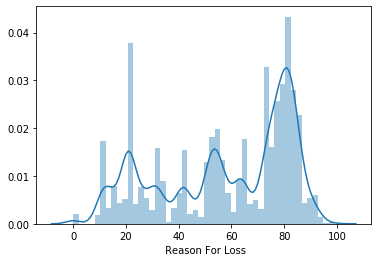

In [8]:

#histogram
sns.distplot(df[' Reason For Loss']);
# sns.distplot(df['File Type']);



*'Ah! I see you that you use seaborn makeup when you're going out... That's so elegant! I also see that you:*

* *<b>Deviate from the normal distribution.</b>*
* *<b>Have appreciable positive skewness.</b>*
* *<b>Show peakedness.</b>*

*This is getting interesting! 'SalePrice', could you give me your body measures?'*

In [6]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

IndentationError: unexpected indent (<ipython-input-6-ed00703cbb02>, line 2)

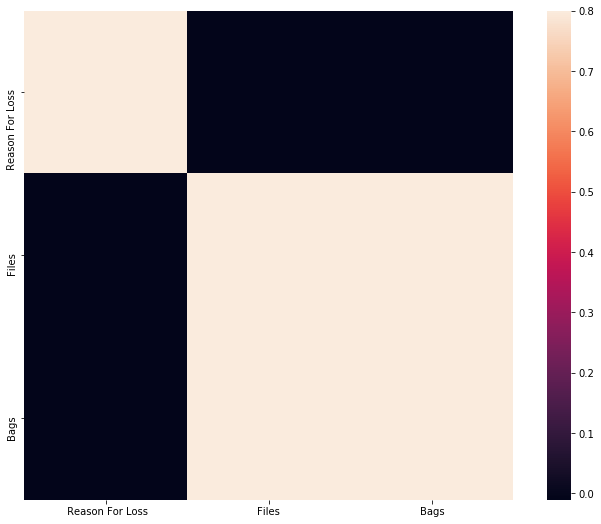

In [30]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);